<a href="https://colab.research.google.com/github/GabrielFePL/Machine-Learning-Fatec-Matao/blob/main/CensusDataAnalisysAndArtificialNeuronDevelopment_Class_17_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Fatec Matão

## Pré-Processamento de Dados

### Importação de Bibliotecas

* O pandas é uma biblioteca do Python usada para manipulação e análise de dados, oferecendo estruturas como DataFrame e Series para organizar, filtrar, transformar e visualizar dados de forma eficiente. Documentação: https://pandas.pydata.org/docs/

* O NumPy é uma biblioteca do Python para cálculos numéricos, oferecendo arrays multidimensionais eficientes e funções matemáticas otimizadas para operações científicas e estatísticas. Documentação: https://numpy.org/doc/

* O Seaborn é uma biblioteca do Python para visualização de dados, baseada no Matplotlib, que facilita a criação de gráficos estatísticos elegantes e informativos com menos código. Documentação: https://seaborn.pydata.org/

* O matplotlib.pyplot é um módulo do Matplotlib que permite criar gráficos estáticos, interativos e personalizados em Python, sendo amplamente usado para visualização de dados. Documentação: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

* O plotly.express é uma biblioteca do Python para criar gráficos interativos e dinâmicos de forma simples, permitindo visualizações ricas e personalizáveis com poucos comandos. Documentação: https://plotly.com/python-api-reference/plotly.express.html

* O sklearn.preprocessing.StandardScaler é uma ferramenta do Scikit-learn para padronizar dados, centralizando a média em 0 e a variância em 1. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

* sklearn.preprocessing.LabelEncoder é uma ferramenta do Scikit-learn usada para transformar variáveis categóricas em valores numéricos inteiros. Cada categoria distinta é convertida em um número inteiro, sendo útil para algoritmos que não trabalham com dados não numéricos. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

* sklearn.preprocessing.OneHotEncoder é uma ferramenta do Scikit-learn que converte variáveis categóricas em uma representação binária (one-hot), criando uma nova coluna para cada categoria com valores 0 ou 1. Essa técnica é essencial para algoritmos que não interpretam valores categóricos ordinais corretamente. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

* sklearn.compose.ColumnTransformer é uma ferramenta do Scikit-learn que permite aplicar diferentes transformações a colunas específicas de um DataFrame de forma eficiente. Com ela, é possível combinar pré-processamentos distintos (como normalização, codificação categórica, etc.) em um único pipeline. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

* O sklearn.model_selection.train_test_split é uma função do Scikit-learn para dividir conjuntos de dados em treinos e testes de forma aleatória. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

* O pickle é um módulo do Python para serialização e desserialização de objetos Python, permitindo salvar e carregar modelos treinados. Documentação: https://docs.python.org/pt-br/dev/library/pickle.html

In [36]:
!pip install plotly --upgrade
!pip install squarify --upgrade

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pickle

### Importação do Dataset e Conversão para Pandas Dataframe

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
census_df = pd.read_csv('/content/drive/MyDrive/machine_learning_semestre_5/census.csv')
census_df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Análise do Dataframe

In [70]:
census_df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [71]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [72]:
census_df.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [73]:
census_df = census_df.rename(columns={'c#income': 'income'})

In [74]:
np.unique(census_df['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

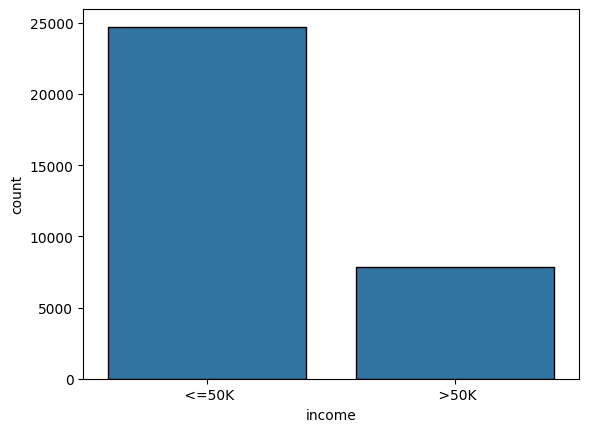

In [75]:
sns.countplot(x = census_df['income'], edgecolor = 'black');

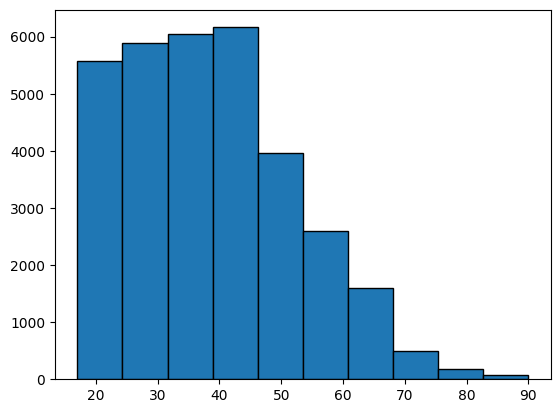

In [76]:
plt.hist(x=census_df['age'], edgecolor='black');

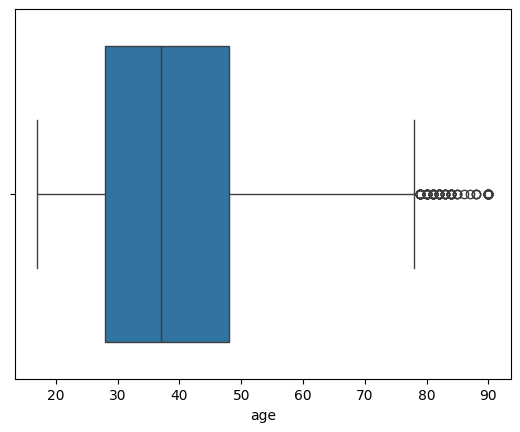

In [77]:
sns.boxplot(x=census_df['age']);

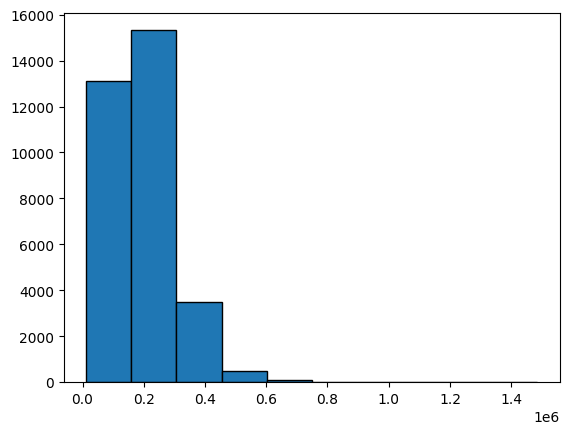

In [78]:
plt.hist(x=census_df['final-weight'], edgecolor='black');

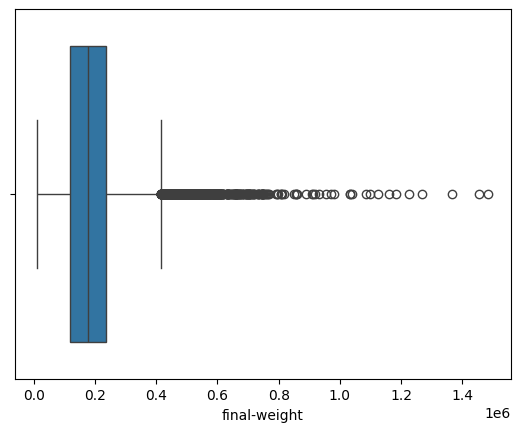

In [79]:
sns.boxplot(x=census_df['final-weight']);

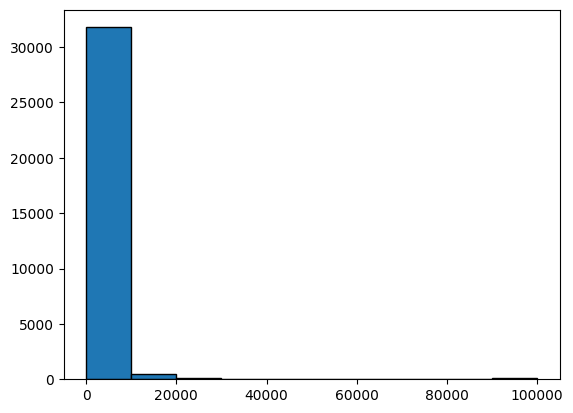

In [80]:
plt.hist(x=census_df['capital-gain'], edgecolor='black');

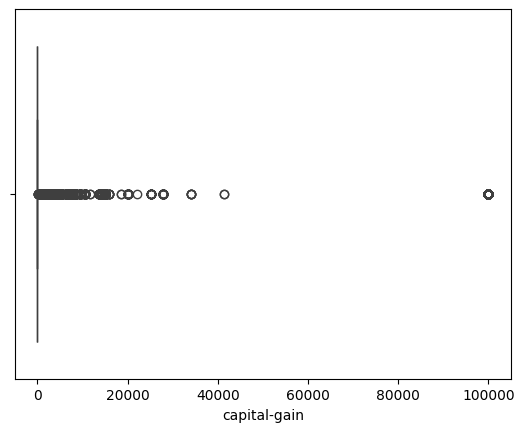

In [81]:
sns.boxplot(x=census_df['capital-gain']);

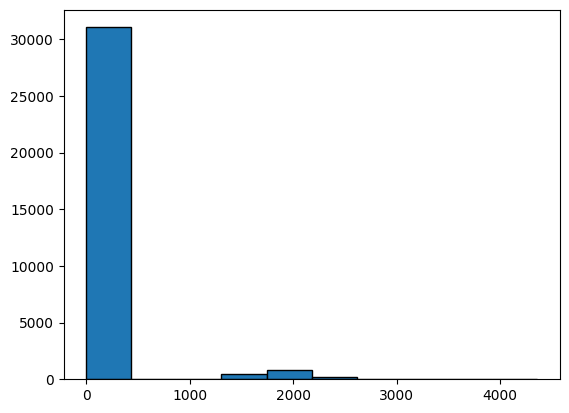

In [82]:
plt.hist(x=census_df['capital-loos'], edgecolor='black');

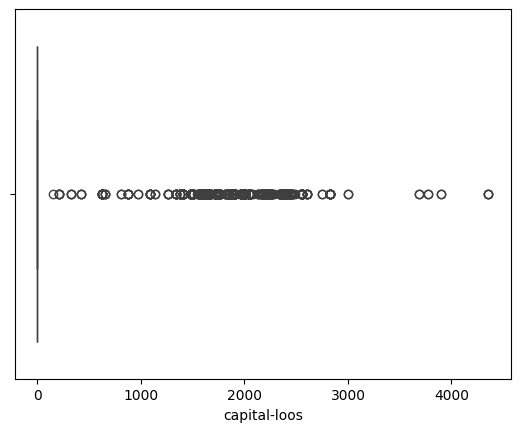

In [83]:
sns.boxplot(x=census_df['capital-loos']);

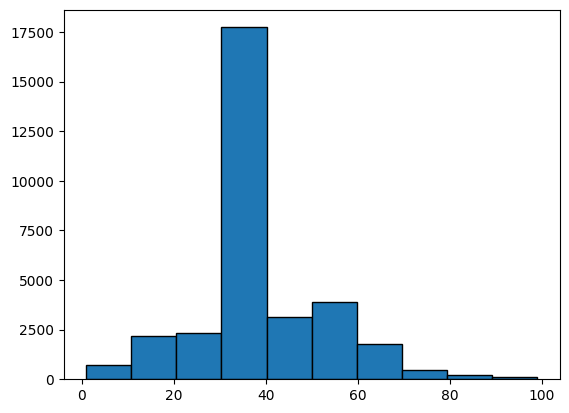

In [84]:
plt.hist(x=census_df['hour-per-week'], edgecolor='black');

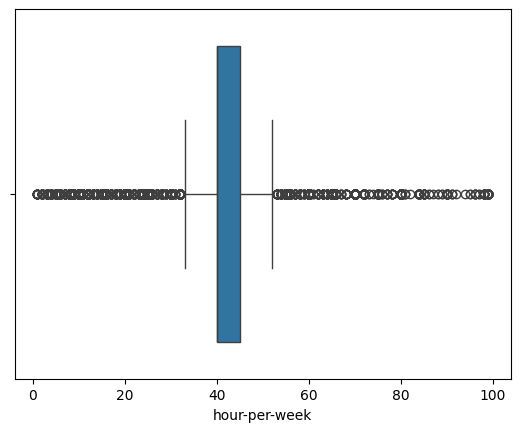

In [85]:
sns.boxplot(x=census_df['hour-per-week']);

In [86]:
def income_transformer(row):
    if row['income'] == ' <=50K':
      return 0
    else:
      return 1

In [87]:
census_df['number_income'] = census_df.apply(income_transformer, axis=1)
census_df.head(10)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,number_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


In [88]:
graphic = px.parallel_categories(census_df, dimensions=['workclass', 'education'], color='number_income')
graphic.show()

In [89]:
graphic = px.parallel_categories(census_df, dimensions=['workclass', 'occupation'], color='number_income')
graphic.show()

In [90]:
graphic = px.parallel_categories(census_df, dimensions=['education', 'income'], color='number_income')
graphic.show()

In [91]:
graphic = px.treemap(census_df, path=['workclass', 'age'])
graphic.show()

In [92]:
graphic = px.treemap(census_df, path=['workclass', 'relationship', 'age'])
graphic.show()

In [93]:
graphic = px.treemap(census_df, path=['occupation', 'age'])
graphic.show()

### Divisão de Previsores (Categóricos e Numéricos) e Classes (Alvos/Resultantes)

In [94]:
x_census = census_df.iloc[:, 0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [128]:
y_census = census_df.iloc[:, 15].values
y_census

array([0, 0, 0, ..., 0, 0, 1])

### Tratamento de Atributos Categóricos

#### Label Encode

In [129]:
x_census[:, 1] = labelEncoder.fit_transform(x_census[:, 1])
x_census[:, 3] = labelEncoder.fit_transform(x_census[:, 3])
x_census[:, 5] = labelEncoder.fit_transform(x_census[:, 5])
x_census[:, 6] = labelEncoder.fit_transform(x_census[:, 6])
x_census[:, 7] = labelEncoder.fit_transform(x_census[:, 7])
x_census[:, 8] = labelEncoder.fit_transform(x_census[:, 8])
x_census[:, 9] = labelEncoder.fit_transform(x_census[:, 9])
x_census[:, 13] = labelEncoder.fit_transform(x_census[:, 13])

#### One Hot Encode

In [97]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [98]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [99]:
x_census.shape

(32561, 108)

### Padronização dos Dados

In [100]:
x_census = standardScaler.fit_transform(x_census)

### Divisão dos Dados de Treinamento e Teste e Conversão de Arquivo para Exportação

In [130]:
x_census_train, x_census_test, y_census_train, y_census_test = train_test_split(x_census, y_census, test_size=0.25, random_state=0)

In [131]:
x_census_train.shape, x_census_test.shape, y_census_train.shape, y_census_test.shape

((24420, 108), (8141, 108), (24420,), (8141,))

In [132]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/census.pkl', mode='wb') as f:
  pickle.dump([x_census_train, x_census_test, y_census_train, y_census_test], f)

## Ingestão Baysidiana de Dados

### Importação de Bibiliotecas

* O sklearn.naive_bayes.GaussianNB é um classificador Naive Bayes do Scikit-learn que assume que os atributos seguem uma distribuição Gaussiana (normal). É amplamente utilizado para problemas de classificação contínua e oferece métodos rápidos para ajustar o modelo e fazer previsões. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

* O sklearn.naive_bayes.MultinomialNB é um classificador Naive Bayes do Scikit-learn adequado para dados discretos, como contagens de frequência. Frequentemente utilizado para classificação de texto e problemas de análise de sentimentos, ele calcula a probabilidade dos atributos com base na distribuição multinomial. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

* O sklearn.metrics.accuracy_score é uma função do Scikit-learn que calcula a acurácia de um modelo de classificação, comparando as previsões com os valores reais. É amplamente utilizada para avaliar o desempenho de modelos classificatórios, retornando a proporção de previsões corretas. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

* O sklearn.metrics.classification_report é uma função do Scikit-learn que gera um relatório com as principais métricas de avaliação de modelos classificatórios, incluindo precisão, recall, F1-score e suporte para cada classe. É útil para interpretar o desempenho do modelo de forma detalhada e comparativa. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

* O yellowbrick.classifier.ConfusionMatrix é um visualizador da biblioteca Yellowbrick que gera uma matriz de confusão gráfica para modelos de classificação. Ele permite visualizar o desempenho do modelo de maneira intuitiva, destacando verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos em um gráfico interativo e colorido. É especialmente útil para análise comparativa e interpretação de resultados. Documentação: https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

In [133]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

### Carregamento da Base de Dados para Ingestão Neural

In [134]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/census.pkl', 'rb') as f:
  x_census_train, x_census_test, y_census_train, y_census_test = pickle.load(f)

### Criação e Treinamento de Neurônios Artificiais

#### Modelo Gaussian NB

In [135]:
gnb_census = GaussianNB()
gnb_census.fit(x_census_train, y_census_train)

GaussianNB()

### Teste e Métricas de Neurônios Artificiais

#### Modelo Gaussian NB

In [136]:
gnb_census_predict = gnb_census.predict(x_census_test)

##### Acurácia

In [137]:
gnb_accuracy = accuracy_score(y_census_test, gnb_census_predict)
gnb_accuracy

0.5221717233755067

In [138]:
print('P(A) = ' + str(round((gnb_accuracy * 100), 2)) + '%')
pa = gnb_accuracy

P(A) = 52.22%


In [141]:
high_income_class = np.sum(y_census_test == 1)
pb = high_income_class / len(y_census_test)
print('P(B) = ' + str(round((pb * 100), 2)) + '%')

P(B) = 24.35%


In [142]:
pab = (pa * pb) / ((pa * pb) + ((1 - pa) * (1 - pb)))
print('P(A|B) = ' + str(round((pab * 100), 2)) + '%')

P(A|B) = 26.02%


##### Matriz Confusão

0.5221717233755067

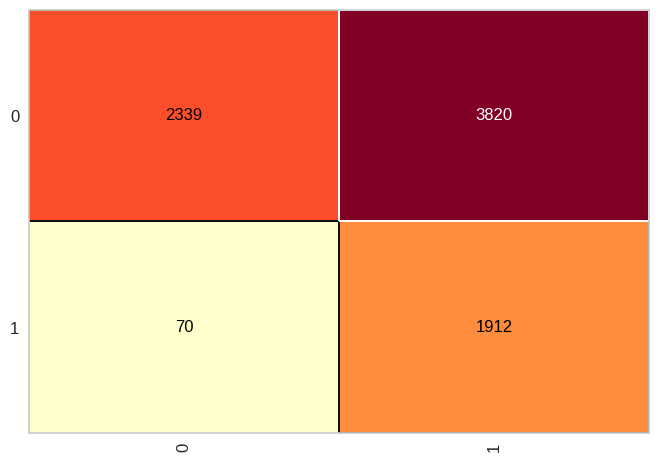

In [144]:
gnb_confusion_matrix = ConfusionMatrix(gnb_census)
gnb_confusion_matrix.fit(x_census_train, y_census_train)
gnb_confusion_matrix.score(x_census_test, y_census_test)